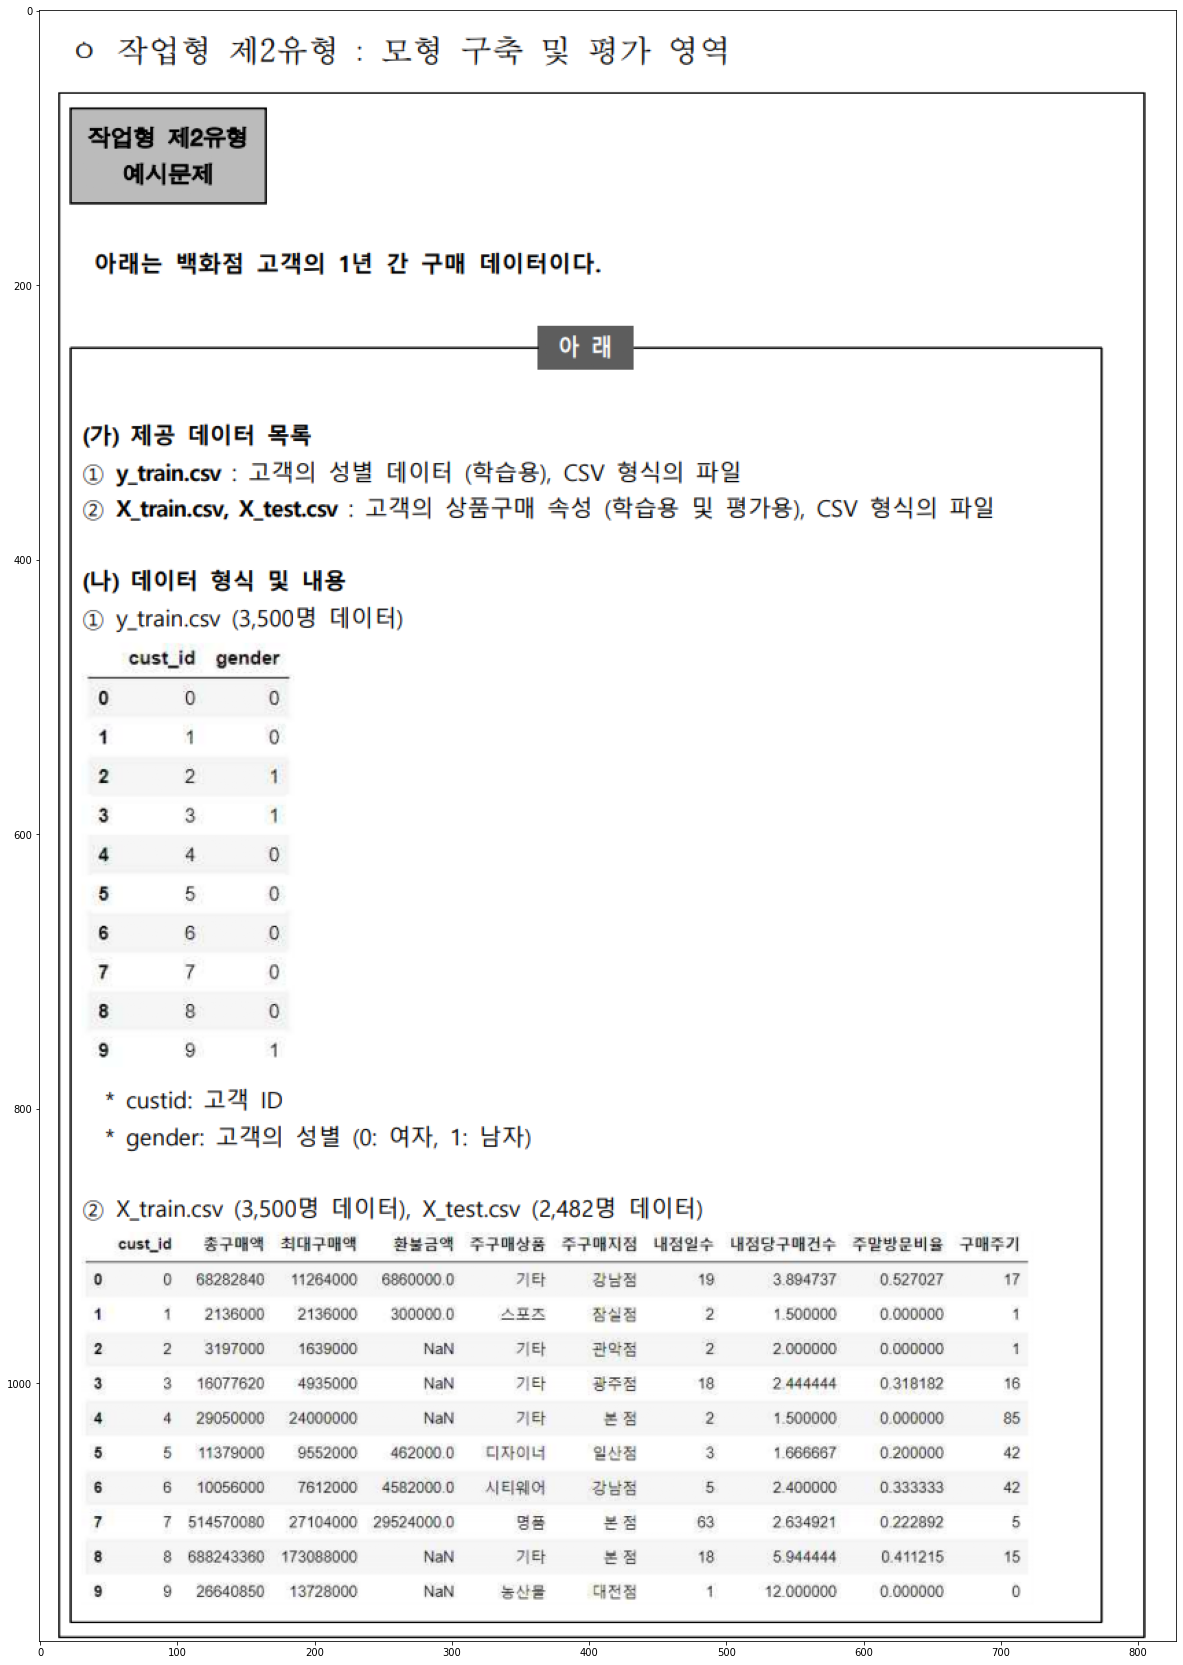

In [1]:
import matplotlib.image as img 
import matplotlib.pyplot as pp 
%matplotlib inline
fileName = "./img/image-20210509230946304.png" 
ndarray = img.imread(fileName) 
pp.rcParams["figure.figsize"] = (30,30)
pp.imshow(ndarray) 
pp.show()

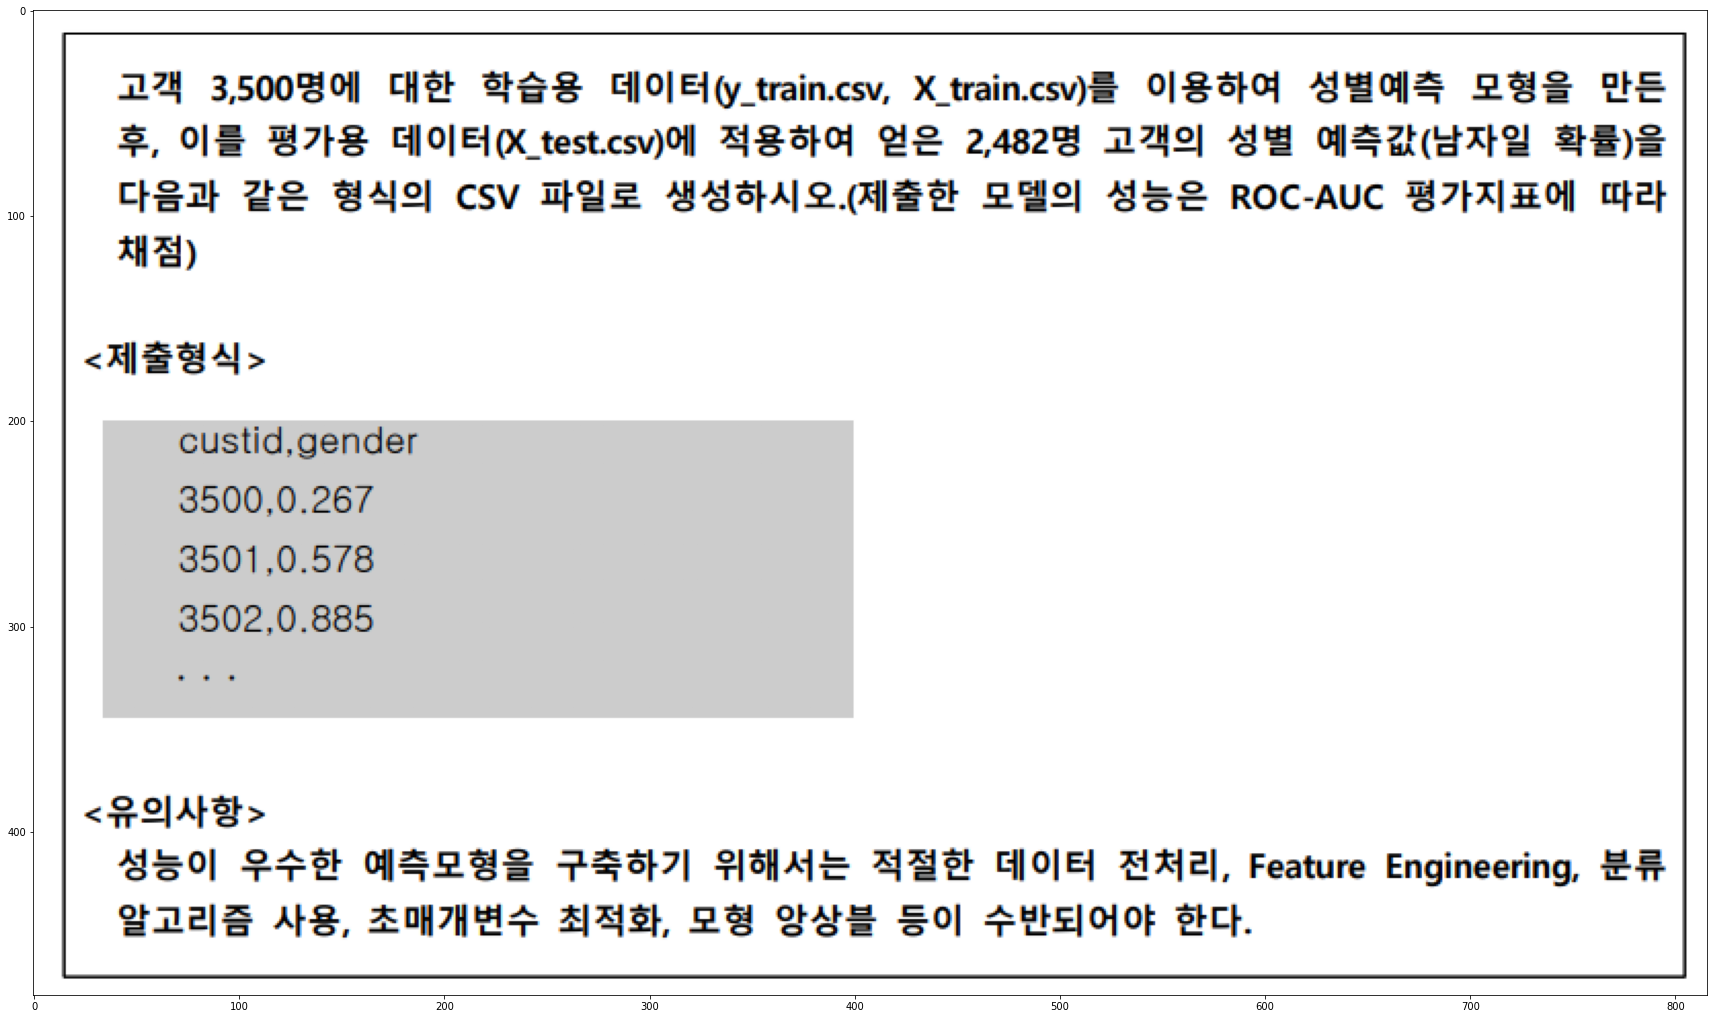

In [2]:
fileName2 = "./img/image-20210509231022522.png" 
ndarray = img.imread(fileName2) 
pp.rcParams["figure.figsize"] = (30,30)
pp.imshow(ndarray) 
pp.show()

In [3]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
x_train = pd.read_csv("./data/X_train.csv",encoding='CP949')
y_train = pd.read_csv("./data/y_train.csv")
test  = pd.read_csv('./data/X_test.csv',encoding='CP949')
print(y_train.shape)
y_train.head()

(3500, 2)


,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


In [4]:
print(x_train.shape)
x_train.head(30)

(3500, 10)


,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
5,5,11379000,9552000,462000.0,디자이너,일산점,3,1.666667,0.200000,42
6,6,10056000,7612000,4582000.0,시티웨어,강남점,5,2.400000,0.333333,42
7,7,514570080,27104000,29524000.0,명품,본 점,63,2.634921,0.222892,5
8,8,688243360,173088000,NaN,기타,본 점,18,5.944444,0.411215,15
9,9,26640850,13728000,NaN,농산물,대전점,1,12.000000,0.000000,0


In [5]:
print(test.shape)
test.head(30)

(2482, 10)


,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8
5,3505,13000000,2160000,NaN,화장품,잠실점,5,2.200000,0.000000,61
6,3506,420892520,69920000,39566000.0,기타,본 점,144,2.618056,0.249337,2
7,3507,1152000,1152000,NaN,스포츠,분당점,1,1.000000,0.000000,0
8,3508,4825000,4825000,NaN,화장품,일산점,1,1.000000,0.000000,0
9,3509,110787210,19255600,23062000.0,가공식품,대전점,28,3.321429,0.376344,12


In [6]:
trainDf = pd.merge(y_train,x_train)
trainDf

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,1,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,0,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0
3496,3496,1,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,0,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,0,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39


In [7]:
trainNAN = trainDf.isnull().sum()
trainNAN

cust_id       0
gender        0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

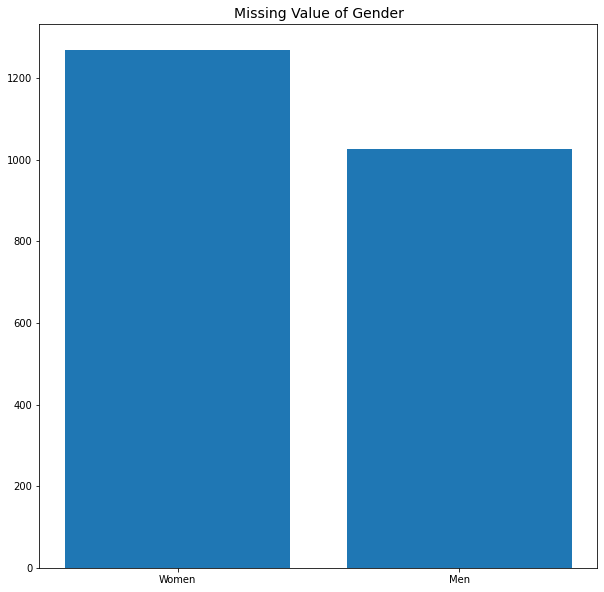

In [8]:
isnullGender = trainDf[trainDf['환불금액'].isnull()].gender.value_counts()
pp.rcParams["figure.figsize"] = (10,10)
pp.bar(isnullGender.index,isnullGender.values)
pp.xticks([0,1],['Women','Men'])
pp.title("Missing Value of Gender",fontsize=14)
pp.show()

In [9]:
trainDf['환불금액'].describe()

count    1.205000e+03
mean     2.407822e+07
std      4.746453e+07
min      5.600000e+03
25%      2.259000e+06
50%      7.392000e+06
75%      2.412000e+07
max      5.637530e+08
Name: 환불금액, dtype: float64

In [10]:
trainDf['환불금액'] =trainDf['환불금액'].fillna(0)
test['환불금액'] = test['환불금액'].fillna(0)

In [11]:
trainDf

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,1,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16
4,4,0,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0
3496,3496,1,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,0,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,0,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39


In [13]:
main_index = trainDf['주구매상품'].value_counts().index
main_index

Index(['기타', '가공식품', '농산물', '화장품', '시티웨어', '디자이너', '수산품', '캐주얼', '명품', '섬유잡화',
       '골프', '스포츠', '일용잡화', '모피/피혁', '육류', '남성 캐주얼', '구두', '건강식품', '차/커피',
       '아동', '피혁잡화', '축산가공', '주방용품', '셔츠', '젓갈/반찬', '주방가전', '트래디셔널', '남성정장',
       '생활잡화', '주류', '가구', '커리어', '란제리/내의', '대형가전', '식기', '액세서리', '침구/수예',
       '통신/컴퓨터', '보석', '남성 트랜디', '소형가전', '악기'],
      dtype='object')

In [14]:
print('주구매상품 유일값 수 ',len(main_index))
print('주구매상품 유일값 리스트 ',list(main_index))

주구매상품 유일값 수  42
주구매상품 유일값 리스트  ['기타', '가공식품', '농산물', '화장품', '시티웨어', '디자이너', '수산품', '캐주얼', '명품', '섬유잡화', '골프', '스포츠', '일용잡화', '모피/피혁', '육류', '남성 캐주얼', '구두', '건강식품', '차/커피', '아동', '피혁잡화', '축산가공', '주방용품', '셔츠', '젓갈/반찬', '주방가전', '트래디셔널', '남성정장', '생활잡화', '주류', '가구', '커리어', '란제리/내의', '대형가전', '식기', '액세서리', '침구/수예', '통신/컴퓨터', '보석', '남성 트랜디', '소형가전', '악기']


In [15]:
main_center = trainDf['주구매지점'].value_counts().index
print('주구매지점 유일값 수 ',len(main_center))
print('주구매지점 유일값 리스트 ',list(main_center))

주구매지점 유일값 수  24
주구매지점 유일값 리스트  ['본  점', '잠실점', '분당점', '부산본점', '영등포점', '일산점', '강남점', '광주점', '노원점', '청량리점', '대전점', '미아점', '부평점', '동래점', '관악점', '인천점', '안양점', '포항점', '대구점', '센텀시티점', '울산점', '전주점', '창원점', '상인점']


총구매액


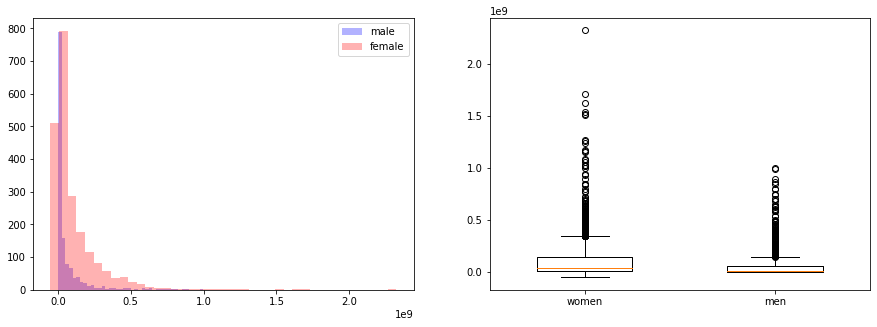

최대구매액


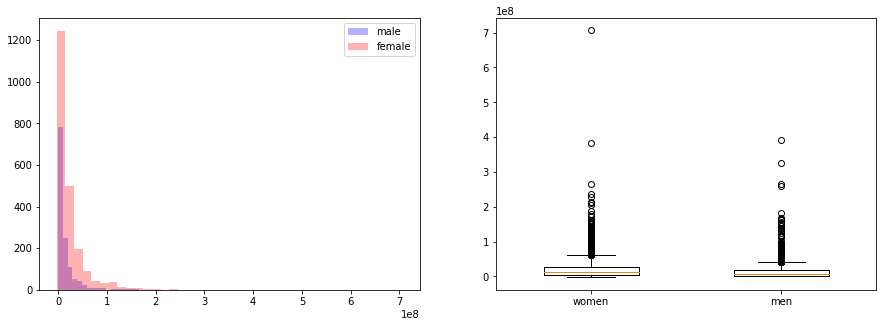

환불금액


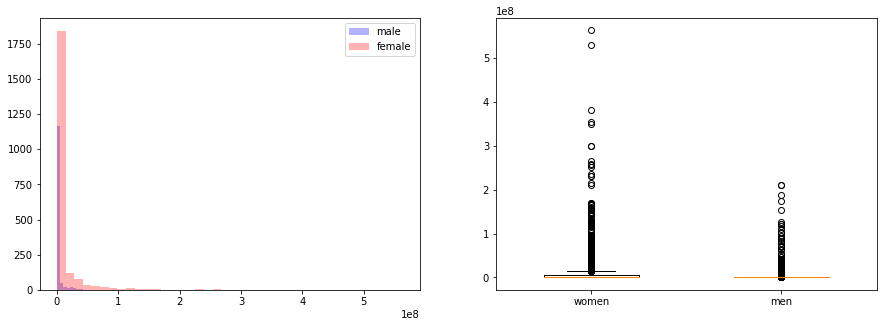

내점일수


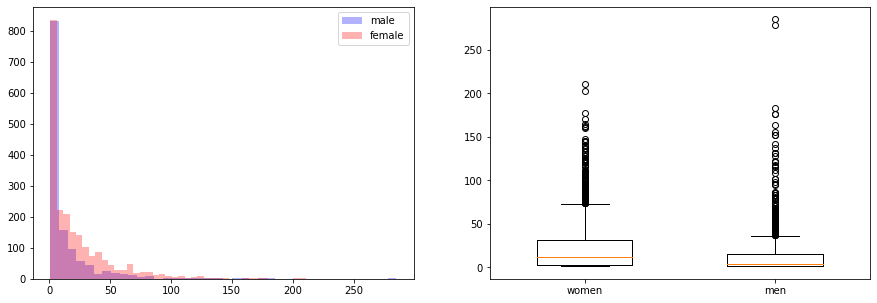

내점당구매건수


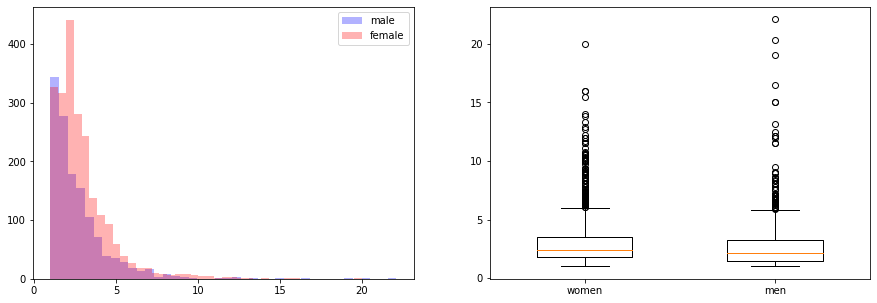

주말방문비율


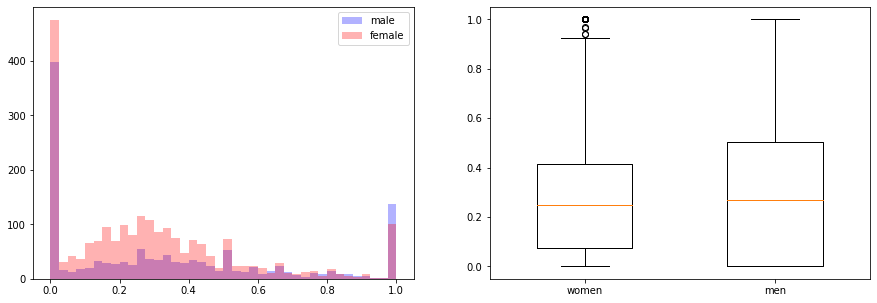

구매주기


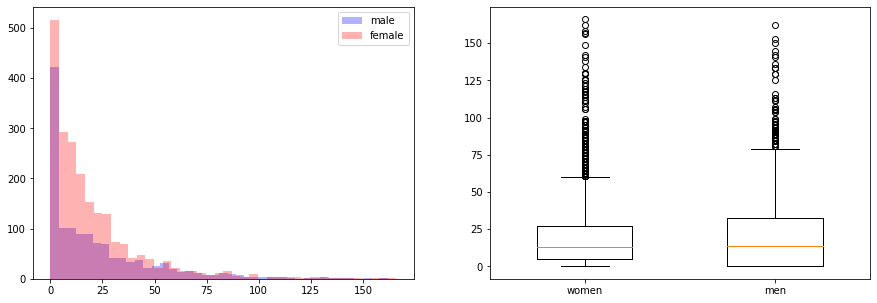

In [18]:
t= trainDf.copy()
import numpy as np
numeric = t.select_dtypes(include=np.number).columns[2:]
for v in numeric:
    df = t[[v,'gender']]
    
    male = df[df.gender==1]
    female = df[df.gender==0]
    fig, axes = pp.subplots(1,2,figsize=(15,5))
    
    print(v)
    axes[0].hist(male[v],alpha=0.3,color='blue',label='male',bins=40)
    axes[0].hist(female[v],alpha=0.3,color='red',label='female',bins=40)
    axes[0].legend()
    axes[1].boxplot(female[v],positions=[0],widths=0.5)
    axes[1].boxplot(male[v],positions=[1],widths=0.5)
    axes[1].set_xticklabels(['women','men'])
    pp.show()

In [19]:
t.groupby('주구매지점').agg(['mean','count'])['총구매액'].sort_values('count',ascending=False).head(3)

,mean,count
주구매지점,,
본 점,1.023784e+08,1077
잠실점,8.377841e+07,474
분당점,7.318428e+07,436


In [20]:
pv_t = t.groupby(['주구매지점','주구매상품']).count()['cust_id'].reset_index().rename(columns={'cust_id':'counts'})

In [21]:
pv_data =pv_t.pivot(index='주구매지점',columns='주구매상품',values='counts').fillna(0)
# pv_data = pv_data/pv_data.sum(axis=1)

for v in pv_data.columns:
    pv_data[v] = pv_data[v]/pv_data.sum(axis=1) *100

pv_data.head(3)

주구매상품,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,...,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
주구매지점,,,,,,,,,,,,,,,,,,,,,
강남점,15.172414,0.0,1.447467,0.000000,0.726639,22.570648,0.775692,0.0,0.0,13.209746,...,0.000000,0.865519,1.733055,0.0,1.737074,0.0,0.0,0.870525,0.871507,7.852356
관악점,6.521739,0.0,0.000000,0.000000,4.038630,23.273689,4.774481,0.0,0.0,15.477830,...,1.350510,0.000000,0.000000,0.0,2.688295,0.0,0.0,0.000000,0.000000,3.995478
광주점,4.385965,0.0,0.881943,2.648588,1.771220,27.509653,0.000000,0.0,0.0,10.073503,...,0.949979,0.000000,1.900861,0.0,5.707962,0.0,0.0,0.000000,0.000000,4.769887


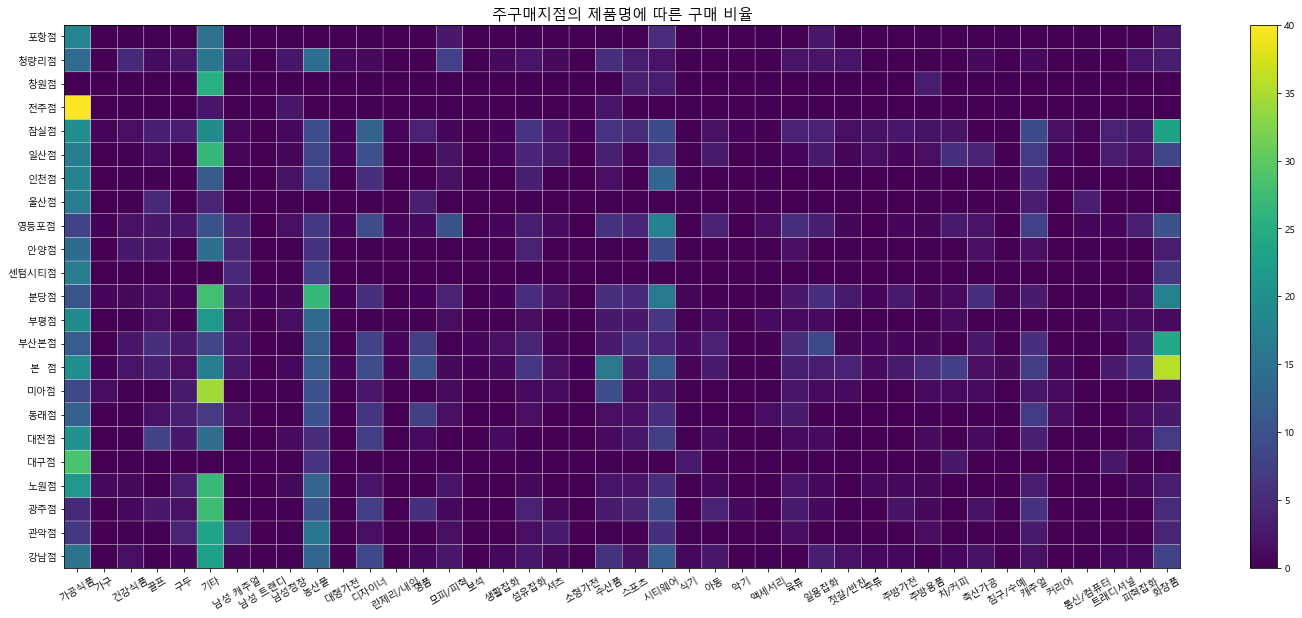

In [26]:
import platform
if platform.system() == 'Darwin': 
        pp.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        pp.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        pp.rc('font', family='Malgun Gothic') 
pp.rcParams['axes.unicode_minus'] = False 
pv_data= pv_data.loc[pv_data.index !='상인점']
pp.figure(figsize=(25,10))
pp.title('지점별 품목 카테고리 구매 건수',fontsize=1)
pp.pcolor(pv_data,edgecolor='white')
pp.colorbar()
pp.xticks(np.arange(pv_data.shape[1])+0.5,pv_data.columns,rotation=30)
pp.yticks(np.arange(pv_data.shape[0])+0.5,pv_data.index)
pp.title('주구매지점의 제품명에 따른 구매 비율',fontsize=15)
pp.show()